# HW 12 - Quantum Mechanics I

### Name: Mohamed Gamal Zaid
### ID: 201700399

In [3]:
import numpy as np
from numpy.random import randint as rand
import matplotlib.pyplot as plt
import time
from scipy.integrate import odeint
from matplotlib.pyplot import cm


# #1 Problem 10.1: Shooting Method

$$\psi_{n+1}=2\psi_n - \psi_{n-1}-2(\Delta x)^2(E-V_n)\psi_n$$

4.898474349070602


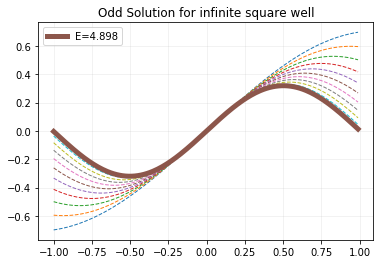

In [3]:
fig = plt.figure()

l=1
E=1
dE = 0.4
b = 2
dx = 0.01
x=np.round(np.arange(-l-1,l+1+dx,dx),3)
lx = x.size
center = np.int(lx/2)

V = np.zeros(lx)
VOutside = 10000
for i in range(lx):
    if x[i]<=-l or x[i]>=l: V[i]=VOutside

st = np.int(lx/4)
en = st*3



psi = np.zeros(lx)
psi[center]=0
psi[center-1]=-dx
i=center
while(np.abs(psi[i])<b and (i+1)<lx):
    psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
    i+=1
psiLast = psi[i]

while(np.abs(dE) >0.000000000001):
    psi = np.zeros(lx)
    psi[center]=0
    psi[center-1]=-dx
    i=center
    while(np.abs(psi[i])<b and (i+1)<lx):
        psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
        i+=1    
    psiNew = psi[i]
    if np.sign(psiNew) != np.sign(psiLast):
        dE = -dE/2
        #print(dE)
    E += dE
    psiLast = psiNew
    #plt.plot(x[quar:3*quar], psi[quar:3*quar])
    psi[:center-1]=-np.flip(psi[center+2:])
    plt.plot(x[st:en], psi[st:en],ls='--',lw=1)

print(E)

plt.plot(x[st:en], psi[st:en],lw=5, label='E='+str(np.round(E,3)))
plt.title("Odd Solution for infinite square well")
plt.legend()
plt.grid(alpha=0.2)


0
E_1=4.898
1
E_2=19.589
2
E_3=44.057
3
E_4=78.28
4
E_5=122.222
5
E_6=175.842
6
E_7=239.086
7
E_8=311.893
8
E_9=394.191
9
E_10=485.9


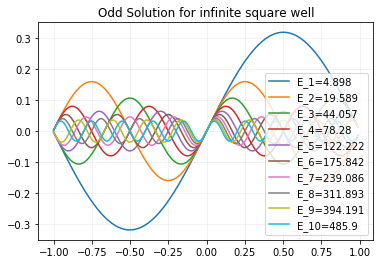

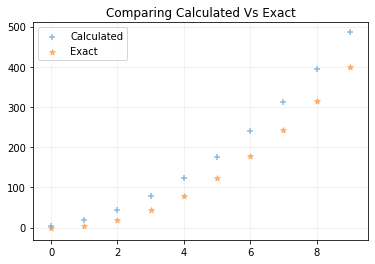

In [4]:
N=10
E_calc = np.zeros(N)
E_exac = np.array([np.power((k*np.pi),2)/2 for k in range(N)])

l=1
E=1
b = 2
dx = 0.01

V = np.zeros(lx)
VOutside = 10000
for i in range(lx):
    if x[i]<=-l or x[i]>=l: V[i]=VOutside

st = np.int(lx/4)
en = st*3


x=np.round(np.arange(-l-1,l+1+dx,dx),3)
lx = x.size
center = np.int(lx/2)
for q in range(N):
    print(q)
    dE = 0.4


    psi = np.zeros(lx)
    psi[center]=1
    psi[center-1]=1
    i=center
    while(np.abs(psi[i])<b and (i+1)<lx):
        psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
        i+=1
    psiLast = psi[i]

    while(np.abs(dE) >0.000000000001):
        psi = np.zeros(lx)
        psi[center]=0
        psi[center-1]=-dx
        i=center
        while(np.abs(psi[i])<b and (i+1)<lx):
            psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
            i+=1    
        psiNew = psi[i]
        if np.sign(psiNew) != np.sign(psiLast):
            dE = -dE/2
            #print(dE)
        E += dE
        psiLast = psiNew
        #plt.plot(x[quar:3*quar], psi[quar:3*quar])
        psi[:center-1]=-np.flip(psi[center+2:])
        #plt.plot(x[st:en], psi[st:en],ls='--',lw=1)
        E_calc[q]=E
    labl = 'E_'+str(q+1)+'='+str(np.round(E,3))
    E +=0.5

    print(labl)
    plt.plot(x[st:en], psi[st:en], label=labl)
plt.grid(alpha=0.2)
plt.title("Odd Solution for infinite square well")
plt.legend()

fig = plt.figure()
plt.scatter(range(len(E_calc)),E_calc,marker='+',label="Calculated",alpha=0.5)
plt.scatter(range(len(E_exac)),E_exac,marker='*',label="Exact",alpha=0.5)
plt.legend()
plt.title("Comparing Calculated Vs Exact")
plt.grid(alpha=0.2)


# #2 Problem 10.2: Shooting Method for the Harmonic Oscillator
$$V=\frac{1}{2}k x^2$$

0.5342298463227053


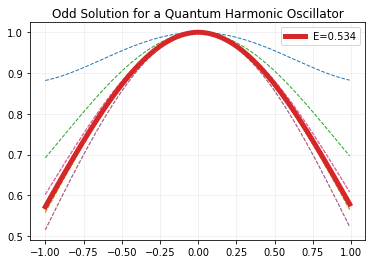

In [5]:
fig = plt.figure()

l=1
E=0.2
dE = 0.4
b = 2
dx = 0.01
x=np.round(np.arange(-l-1,l+1+dx,dx),3)
lx = x.size
center = np.int(lx/2)

V = np.zeros(lx)

for i in range(lx):
    V[i]=np.power(x[i],2)/2
    #if x[i]<=-l or x[i]>=l: V[i]=VOutside

st = np.int(lx/4)
en = st*3



psi = np.zeros(lx)
psi[center]=1
psi[center-1]=1
i=center
while(np.abs(psi[i])<b and (i+1)<lx):
    psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
    i+=1
psiLast = psi[i]

while(np.abs(dE) >0.000000000001):
    psi = np.zeros(lx)
    psi[center]=1
    psi[center-1]=1
    i=center
    while(np.abs(psi[i])<b and (i+1)<lx):
        psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
        i+=1    
    psiNew = psi[i]
    if np.sign(psiNew) != np.sign(psiLast):
        dE = -dE/2
        #print(dE)
    E += dE
    psiLast = psiNew
    #plt.plot(x[quar:3*quar], psi[quar:3*quar])
    psi[:center-1]=np.flip(psi[center+2:])
    plt.plot(x[st:en], psi[st:en],ls='--',lw=1)

print(E)

plt.plot(x[st:en], psi[st:en],lw=5, label='E='+str(np.round(E,3)))
plt.title("Odd Solution for a Quantum Harmonic Oscillator")
plt.legend()
plt.grid(alpha=0.2)


0
E_0=0.534
1
E_1=1.765
2
E_2=3.384
3
E_3=5.584
4
E_4=8.328
5
E_5=11.763
6
E_6=15.696
7
E_7=20.397
8
E_8=25.511
9
E_9=31.492


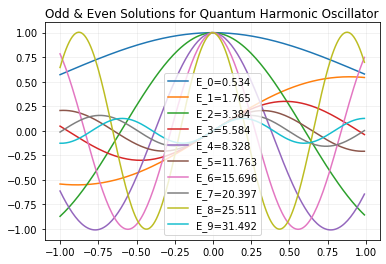

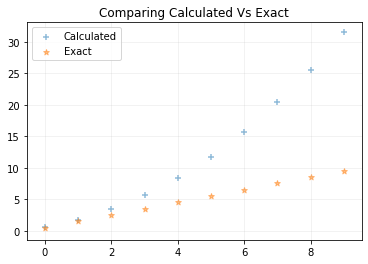

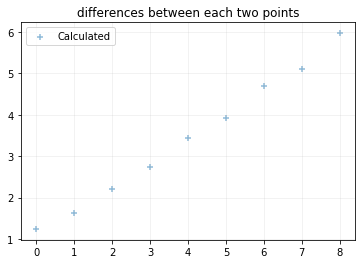

In [6]:
N=10
E_calc = np.zeros(N)
E_exac = np.array([(k+.5) for k in range(N)])

l=1
E=0.2
b = 2
dx = 0.01

V = np.zeros(lx)
for i in range(lx):
    V[i]=np.power(x[i],2)/2

st = np.int(lx/4)
en = st*3


x=np.round(np.arange(-l-1,l+1+dx,dx),3)
lx = x.size
center = np.int(lx/2)
for q in range(N):
    print(q)
    dE = 0.4


    psi = np.zeros(lx)
    if q%2==0:
        psi[center]=1
        psi[center-1]=1
    else:
        psi[center]=0
        psi[center-1]=-dx
    i=center
    while(np.abs(psi[i])<b and (i+1)<lx):
        psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
        i+=1
    psiLast = psi[i]

    while(np.abs(dE) >0.000000000001):
        psi = np.zeros(lx)
        if q%2==0:
            psi[center]=1
            psi[center-1]=1
        else:
            psi[center]=0
            psi[center-1]=-dx
        
        i=center
        while(np.abs(psi[i])<b and (i+1)<lx):
            psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
            i+=1    
        psiNew = psi[i]
        if np.sign(psiNew) != np.sign(psiLast):
            dE = -dE/2
            #print(dE)
        E += dE
        psiLast = psiNew
        #plt.plot(x[quar:3*quar], psi[quar:3*quar])
        if q%2==0:
            psi[:center-1]=np.flip(psi[center+2:])
        else:
            psi[:center-1]=-np.flip(psi[center+2:])
        #plt.plot(x[st:en], psi[st:en],ls='--',lw=1)
    E_calc[q]=E
    labl = 'E_'+str(q)+'='+str(np.round(E,3))
    E +=0.1

    print(labl)
    plt.plot(x[st:en], psi[st:en], label=labl)
plt.grid(alpha=0.2)
plt.title("Odd & Even Solutions for Quantum Harmonic Oscillator")
plt.legend()

fig = plt.figure()
plt.scatter(range(len(E_calc)),E_calc,marker='+',label="Calculated",alpha=0.5)
plt.scatter(range(len(E_exac)),E_exac,marker='*',label="Exact",alpha=0.5)
plt.legend()
plt.title("Comparing Calculated Vs Exact")
plt.grid(alpha=0.2)


fig = plt.figure()
plt.scatter(range(len(E_calc)-1),np.diff(E_calc),marker='+',label="Calculated",alpha=0.5)
plt.legend()
plt.title("differences between each two points")
plt.grid(alpha=0.2)


# #3 Problem 10.7: Shooting Method for the Hydrogen Atom for l=0
$$\dfrac{d^2g}{dr^2}=\big(2[v(r)-E]+\dfrac{1}{r^2}\big)g$$
$$g_{n+1}=2g_n - g_{n-1}+(\Delta r)^2\big(2[v(r)-E]+\dfrac{1}{r^2}\big)g_n$$
$$V(r)=-\frac{1}{r}$$
## (a) obtain first two eigenvalues


Eigenvalue #1
E_1=-0.482
Eigenvalue #2
E_2=-0.122


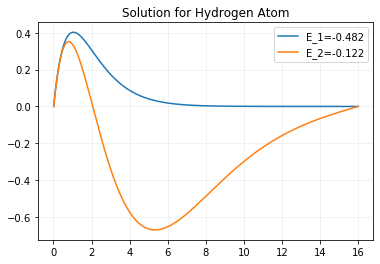

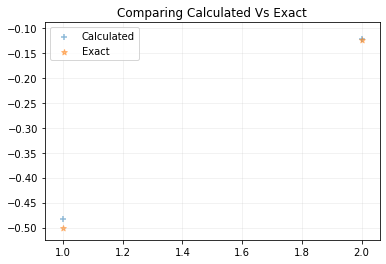

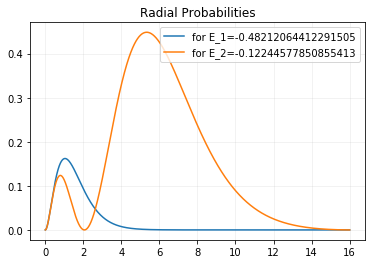

In [32]:
N=2



E_calc = np.zeros(N)

E_exac = np.array([-(1/(2*np.power(n,2))) for n in range(1,N+1)])

l=15
E= -0.5
b = 2
dr = 0.01
r=np.round(np.arange(0.01,l+1+dr,dr),3)
lr = r.size

RadialProb = np.zeros([N,lr])

V = np.zeros(lr)
for i in range(lr):
    V[i]=-1/r[i]


for q in range(N):
    dE = 0.1

    print("Eigenvalue #"+str(q+1))


    g = np.zeros(lr)
    g[1]=dr
    g[0]=0
    i=1
    while(np.abs(g[i])<b and (i+1)<lr):
        g[i+1]=2* g[i] - g[i-1] - 2 * np.power(dr,2)*(E-V[i])*g[i]
        i+=1
    gLast = g[i]
    while(np.abs(dE) >0.000000000001):
        g = np.zeros(lr)
        g[1]=dr
        g[0]=0
        i=1
        while(np.abs(g[i])<b and (i+1)<lr):
            g[i+1]=2* g[i] - g[i-1] - 2 * np.power(dr,2)*(E-V[i])*g[i]
            i+=1

        gNew = g[i]
        if np.sign(gNew) != np.sign(gLast):
            dE = -dE/2
        E += dE
        #print(E)
        gLast = gNew
    E_calc[q]=E
    labl = 'E_'+str(q+1)+'='+str(np.round(E,3))
    E +=0.01
    
    print(labl)
    plt.plot(r, g, label=labl)
    
    RadialProb[q] = np.power(g, 2)
    
plt.grid(alpha=0.2)
plt.title("Solution for Hydrogen Atom")
plt.legend()

fig = plt.figure()
plt.scatter(range(1,len(E_calc)+1),E_calc,marker='+',label="Calculated",alpha=0.5)
plt.scatter(range(1,len(E_exac)+1),E_exac,marker='*',label="Exact",alpha=0.5)
plt.legend()
plt.title("Comparing Calculated Vs Exact")
plt.grid(alpha=0.2)

fig = plt.figure()
for i in range(N):
    plt.plot(r, RadialProb[i], label = "for E_"+str(i+1)+"="+str(E_calc[i]))
plt.legend()
plt.title("Radial Probabilities")
plt.grid(alpha=0.2)

